#dataset train

In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('LoanApprovalPrediction.csv')


In [14]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [16]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [17]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

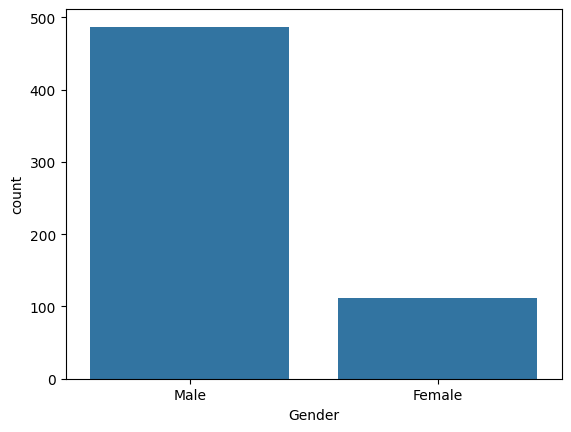

In [19]:
sns.countplot(x = df['Gender'])

In [20]:
df['Gender'].mode()[0]

'Male'

In [21]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])

<Axes: xlabel='Married', ylabel='count'>

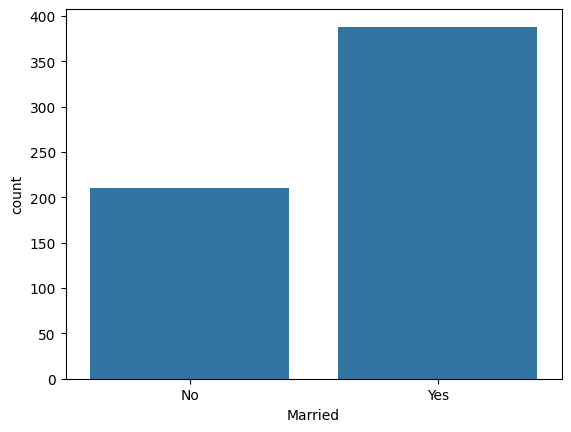

In [22]:
sns.countplot(x = df['Married'])

In [23]:
df['Married'].mode()[0]

'Yes'

In [24]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])


<Axes: xlabel='Dependents', ylabel='count'>

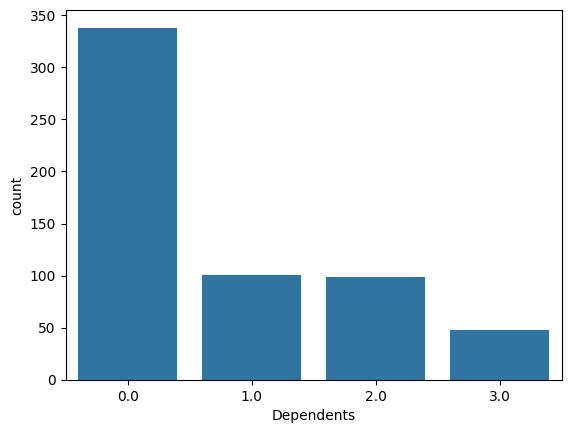

In [25]:
sns.countplot(x=df['Dependents'])

In [26]:
df['Dependents'].value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

In [27]:
df['Dependents'].mode()[0]

np.float64(0.0)

In [28]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

<Axes: xlabel='Self_Employed', ylabel='count'>

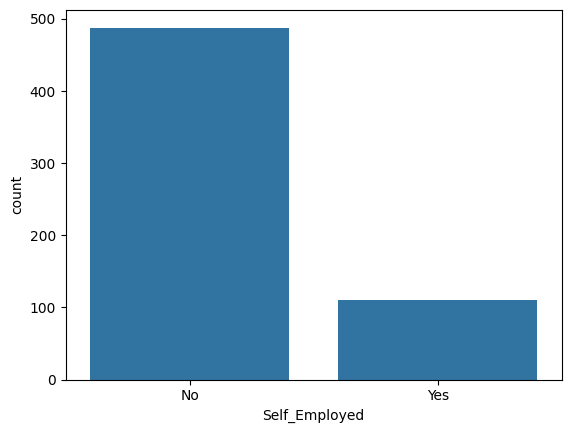

In [29]:
sns.countplot(x = df['Self_Employed'])

In [30]:
df['Self_Employed'].mode()[0]

'No'

In [31]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [32]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [33]:
df['LoanAmount'].median()

np.float64(127.0)

In [34]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount']).median()

In [36]:
df['Loan_Amount_Term'].median()

np.float64(360.0)

In [37]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term']).median()

<Axes: xlabel='Credit_History', ylabel='count'>

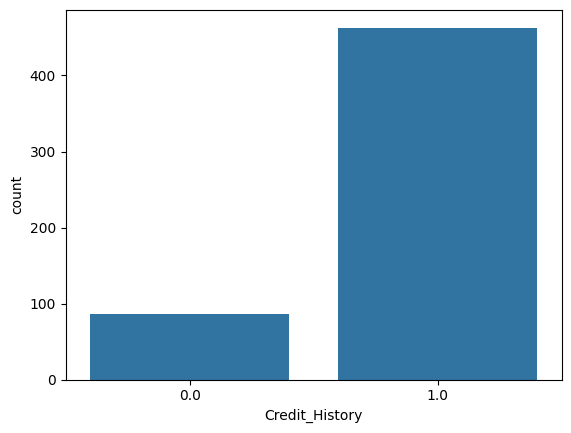

In [38]:
sns.countplot(x = df['Credit_History'])

In [40]:
df['Credit_History'].mode()[0]

np.float64(1.0)

In [41]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [42]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,127.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,127.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,127.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,127.0,360.0,1.0,Urban,Y


In [45]:
df.replace({
    "Loan_Status":{'N':0,'Y':1},
    "Gender":{'Male':0,'Female':1},
    "Education":{'Not Graduate':0,'Graduate':1},
    "Married":{'No':0,'Yes':1},
    "Self_Employed":{'No':0,'Yes':1}
},inplace=True)

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.0,1,0,5849,0.0,127.0,360.0,1.0,Urban,1
1,LP001003,0,1,1.0,1,0,4583,1508.0,127.0,360.0,1.0,Rural,0
2,LP001005,0,1,0.0,1,1,3000,0.0,127.0,360.0,1.0,Urban,1
3,LP001006,0,1,0.0,0,0,2583,2358.0,127.0,360.0,1.0,Urban,1
4,LP001008,0,0,0.0,1,0,6000,0.0,127.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,1,0,0.0,1,0,2900,0.0,127.0,360.0,1.0,Rural,1
594,LP002979,0,1,3.0,1,0,4106,0.0,127.0,360.0,1.0,Rural,1
595,LP002983,0,1,1.0,1,0,8072,240.0,127.0,360.0,1.0,Urban,1
596,LP002984,0,1,2.0,1,0,7583,0.0,127.0,360.0,1.0,Urban,1


In [47]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status','Loan_ID'],axis=1)
    x = pd.get_dummies(data = x,columns = ["Property_Area","Dependents"])
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train,x_test,y_train,y_test,features

In [48]:
x_train,x_test,y_train,y_test,features = train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       127.0             360.0             1.0   
1             1508.0       127.0             360.0             1.0   
2                0.0       127.0             360.0             1.0   
3             2358.0       127.0             360.0             1.0   
4                0.0       127.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    Fa

In [49]:
def fit_and_evaluate_model(x_train,x_test,y_train,y_test):
    random_forest = RandomForestClassifier(random_state=0,\
        max_depth=5,\
        min_samples_split=0.01,\
        max_features=0.8,
        max_samples=0.8)
    
    model = random_forest.fit(x_train,y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test,random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test,random_forest_predict)
    print("confusion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [50]:
model = fit_and_evaluate_model(x_train,x_test,y_train,y_test)

confusion matrix
[[15 19]
 [ 4 82]]


Accuracy of Random Forest: 80.83333333333333 

              precision    recall  f1-score   support

           0       0.79      0.44      0.57        34
           1       0.81      0.95      0.88        86

    accuracy                           0.81       120
   macro avg       0.80      0.70      0.72       120
weighted avg       0.81      0.81      0.79       120



In [51]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance',ascending=True,inplace=True)

<BarContainer object of 16 artists>

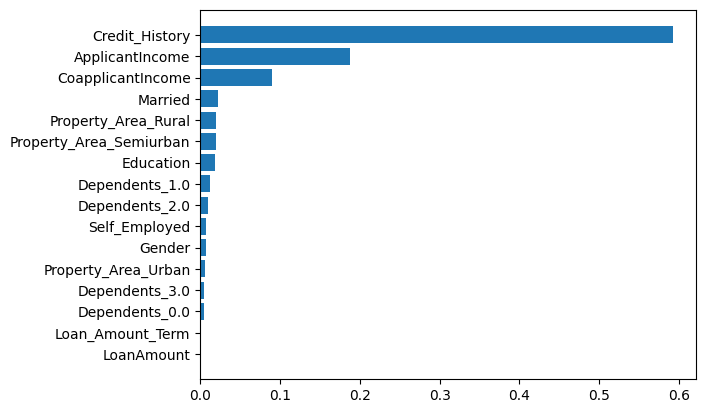

In [54]:
plt.barh(importances.feature,importances.importance)

In [55]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.52162519 0.47837481]
 [0.16519173 0.83480827]
 [0.20227391 0.79772609]
 [0.23060521 0.76939479]
 [0.25449381 0.74550619]
 [0.93808143 0.06191857]
 [0.25152425 0.74847575]
 [0.19292192 0.80707808]
 [0.16209663 0.83790337]
 [0.1409727  0.8590273 ]]
[0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0]
